In [4]:
!pip install kaggle

In [7]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:08<00:00, 23.9MB/s]
100% 163M/163M [00:08<00:00, 19.9MB/s]


In [9]:
from zipfile import ZipFile
file_name = "/content/face-mask-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split

In [20]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [21]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


In [22]:
print(with_mask_files[0:5])
print(without_mask_files[0:5])

['with_mask_2315.jpg', 'with_mask_2566.jpg', 'with_mask_1311.jpg', 'with_mask_2116.jpg', 'with_mask_1585.jpg']
['without_mask_1205.jpg', 'without_mask_2036.jpg', 'without_mask_2570.jpg', 'without_mask_631.jpg', 'without_mask_1772.jpg']


With Mask-----> 1

Without Mask----> 0

In [23]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [24]:
labels = with_mask_labels + without_mask_labels

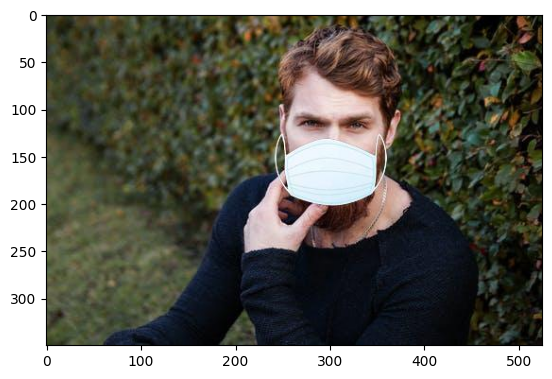

In [25]:
img = mpimg.imread('/content/data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

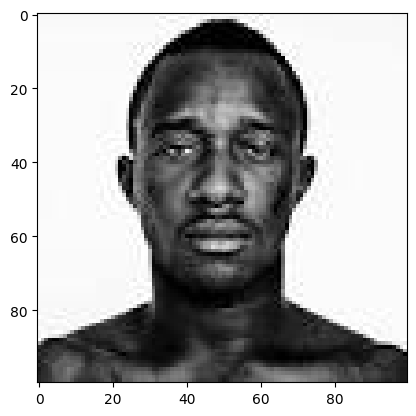

In [26]:
img = mpimg.imread('/content/data/without_mask/without_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

Resize

In [27]:
with_mask = '/content/data/with_mask/'
without_mask = '/content/data/without_mask/'

In [28]:
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

for img_file in without_mask_files:
  image = Image.open(without_mask+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [30]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
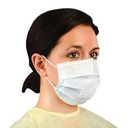

In [37]:
data[0]

In [31]:
x=np.array(data)
y=np.array(labels)

In [32]:
x.shape

(7553, 128, 128, 3)

In [33]:
y.shape

(7553,)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

array([[[ 58,  61,  67],
        [ 39,  42,  48],
        [140, 142, 146],
        ...,
        [ 34,  35,  21],
        [ 30,  31,  17],
        [ 31,  32,  18]],

       [[ 64,  67,  75],
        [ 49,  52,  58],
        [151, 153, 158],
        ...,
        [ 33,  34,  20],
        [ 34,  35,  21],
        [ 33,  34,  20]],

       [[ 68,  70,  81],
        [ 56,  59,  67],
        [105, 107, 114],
        ...,
        [ 31,  31,  17],
        [ 41,  40,  27],
        [ 43,  42,  29]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
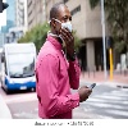

In [36]:
x_train[0]

In [38]:
x_train_scaled[0]

array([[[0.22745098, 0.23921569, 0.2627451 ],
        [0.15294118, 0.16470588, 0.18823529],
        [0.54901961, 0.55686275, 0.57254902],
        ...,
        [0.13333333, 0.1372549 , 0.08235294],
        [0.11764706, 0.12156863, 0.06666667],
        [0.12156863, 0.1254902 , 0.07058824]],

       [[0.25098039, 0.2627451 , 0.29411765],
        [0.19215686, 0.20392157, 0.22745098],
        [0.59215686, 0.6       , 0.61960784],
        ...,
        [0.12941176, 0.13333333, 0.07843137],
        [0.13333333, 0.1372549 , 0.08235294],
        [0.12941176, 0.13333333, 0.07843137]],

       [[0.26666667, 0.2745098 , 0.31764706],
        [0.21960784, 0.23137255, 0.2627451 ],
        [0.41176471, 0.41960784, 0.44705882],
        ...,
        [0.12156863, 0.12156863, 0.06666667],
        [0.16078431, 0.15686275, 0.10588235],
        [0.16862745, 0.16470588, 0.11372549]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [39]:
from tensorflow import keras

In [40]:
num_of_class = 2

In [41]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_class, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [43]:
final = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=7)

Epoch 1/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - acc: 0.6960 - loss: 0.6471 - val_acc: 0.8479 - val_loss: 0.3603
Epoch 2/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8685 - loss: 0.3250 - val_acc: 0.9074 - val_loss: 0.2427
Epoch 3/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9078 - loss: 0.2415 - val_acc: 0.9174 - val_loss: 0.2671
Epoch 4/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9157 - loss: 0.2126 - val_acc: 0.9190 - val_loss: 0.2459
Epoch 5/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9361 - loss: 0.1822 - val_acc: 0.9289 - val_loss: 0.2458
Epoch 6/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9427 - loss: 0.1431 - val_acc: 0.8942 - val_loss: 0.3604
Epoch 7/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9495 - loss: 0.1305 - val_acc: 0.9074 - val_loss: 0.2794


In [44]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.9226 - loss: 0.1858
Test Accuracy = 0.9252150654792786


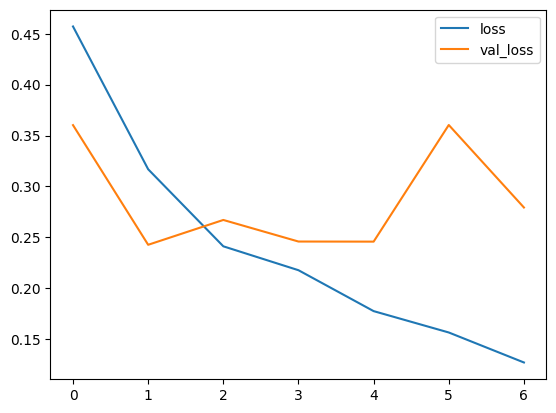

In [45]:
f = final

plt.plot(f.history['loss'], label='loss')
plt.plot(f.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

Model

Path: /content/pexels-itfeelslikefilm-695954.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.3779195  0.55635184]]
1
The person in the image is wearing a mask


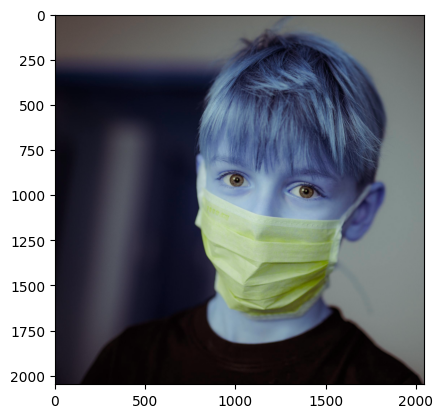

In [54]:
input_image_path = input('Path: ')

input_image= cv2.imread(input_image_path)

plt.imshow(input_image)

resized = cv2.resize(input_image, (128,128))

scaled = resized/255

reshaped = np.reshape(scaled, (1,128,128,3))

prediction = model.predict(reshaped)

print(prediction)

input_pred_label = np.argmax(prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')


Path: /content/pexels-ashutoshsonwani-1852482.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.03984216 0.93519   ]]
1
The person in the image is wearing a mask


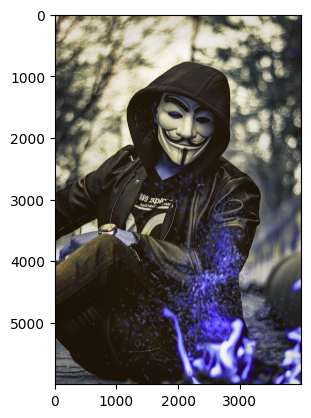

In [55]:
input_image_path = input('Path: ')

input_image= cv2.imread(input_image_path)

plt.imshow(input_image)

resized = cv2.resize(input_image, (128,128))

scaled = resized/255

reshaped = np.reshape(scaled, (1,128,128,3))

prediction = model.predict(reshaped)

print(prediction)

input_pred_label = np.argmax(prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')


Path: /content/pexels-shvetsa-4167544.jpg.crdownload
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.52235    0.42107266]]
0
No Mask


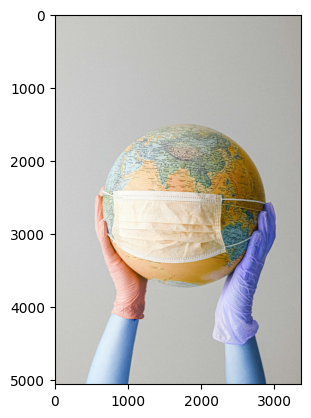

In [50]:
input_image_path = input('Path: ')

input_image= cv2.imread(input_image_path)

plt.imshow(input_image)

resized = cv2.resize(input_image, (128,128))

scaled = resized/255

reshaped = np.reshape(scaled, (1,128,128,3))

prediction = model.predict(reshaped)

print(prediction)

input_pred_label = np.argmax(prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')


Path: /content/pexels-justin-shaifer-501272-1222271.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.49489203 0.4272044 ]]
0
The person in the image is not wearing a mask


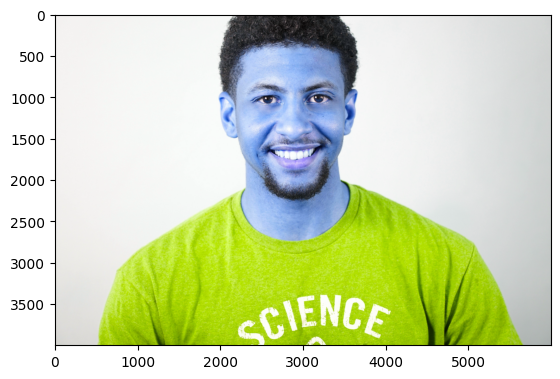

In [57]:
input_image_path = input('Path: ')

input_image= cv2.imread(input_image_path)

plt.imshow(input_image)

resized = cv2.resize(input_image, (128,128))

scaled = resized/255

reshaped = np.reshape(scaled, (1,128,128,3))

prediction = model.predict(reshaped)

print(prediction)

input_pred_label = np.argmax(prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')
